In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
import sys
from decimal import *
# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
print(lats.min())
print(lats.max())
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

-89.93857204187304
89.87231973102405


627

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66


In [4]:
weather_data_list = []
cities_count = len(cities)

print('Begining Data Retrieval')

for i in range(len(cities)):
    target_url=url+"&q="+cities[i]
    print(target_url)
    
    if (i+1)%60==0:
        print('Taking break for a min--------------------')
        time.sleep(61)
        
        
    
    print(f"processing record {i} of {cities_count}")
    response = requests.get(target_url).json()
    
    if(response['cod']!='404'): #skipping the records where the API return status code "404" Not Found Error
        
        country=response['sys']['country']
        
        date=response['dt']
        
        lattitude=response['coord']['lat'] #reads the latitiude from the JSON response
        
        longitude=response['coord']['lon'] 
        
        temperature=response['main']['temp_max'] #temperature
                
        humidity=response['main']['humidity'] #humidity %
                
        clouds=response['clouds']['all'] #Clouds %
        
        windspeed=response['wind']['speed']

        
        #Creating a dictionary with weather data
        weather_data_dictionary = {"City":cities[i],"Cloudiness":clouds,"Country":country,"Date":date,"Humidity":humidity,"Lat":lattitude,"Lng":longitude,"Max Temp":temperature,"Wind Speed":windspeed}
        weather_data_list.append(weather_data_dictionary)

print("All Done!----------")
city_data_df = pd.DataFrame(weather_data_list)
        
    

Begining Data Retrieval
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=bluff
processing record 0 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=laguna
processing record 1 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=vaini
processing record 2 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=georgetown
processing record 3 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=punta arenas
processing record 4 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=tabiauea
processing record 5 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=cape town
processing record 6 of 627
http

processing record 59 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=zhezkazgan
processing record 60 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=broome
processing record 61 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=cayenne
processing record 62 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=gat
processing record 63 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=bolivar
processing record 64 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=nemuro
processing record 65 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=dikson
processing record 66 of 627
htt

processing record 119 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=ponta do sol
processing record 120 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=rawannawi
processing record 121 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=te anau
processing record 122 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=saskylakh
processing record 123 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=vila
processing record 124 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=tazovskiy
processing record 125 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=sabaudia
processing 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=kruisfontein
processing record 178 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=grindavik
Taking break for a min--------------------
processing record 179 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=wajima
processing record 180 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=margate
processing record 181 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=vesyegonsk
processing record 182 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=provideniya
processing record 183 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=p

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=ondangwa
processing record 237 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=quelimane
processing record 238 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=severo-kurilsk
Taking break for a min--------------------
processing record 239 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=aksarka
processing record 240 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=impfondo
processing record 241 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=nyurba
processing record 242 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=tala

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=bengkulu
processing record 295 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=hovd
processing record 296 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=nyagan
processing record 297 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=yerkoy
processing record 298 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=sorland
Taking break for a min--------------------
processing record 299 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=keetmanshoop
processing record 300 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=altay
process

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=mys shmidta
processing record 353 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=evensk
processing record 354 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=chernyshevskiy
processing record 355 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=buluang
processing record 356 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=bella union
processing record 357 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=wajid
processing record 358 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=wolgast
Taking break for a min---------------

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=boende
processing record 411 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=aripuana
processing record 412 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=saint quentin
processing record 413 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=manicore
processing record 414 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=buraydah
processing record 415 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=verkhnetulomskiy
processing record 416 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=xianyang
processing record 417 of 627
ht

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=xai-xai
processing record 470 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=atlantic city
processing record 471 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=zhongxing
processing record 472 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=bilibino
processing record 473 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=paamiut
processing record 474 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=rungata
processing record 475 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=christchurch
processing record 476 of 627
http:/

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=namalenga
processing record 529 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=qui nhon
processing record 530 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=lakatoro
processing record 531 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=shingu
processing record 532 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=sumbe
processing record 533 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=lake cowichan
processing record 534 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=preobrazheniye
processing record 535 of 627
http:/

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=budhlada
processing record 587 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=monte alegre
processing record 588 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=arlit
processing record 589 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=kerteh
processing record 590 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=lake city
processing record 591 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=horconcitos
processing record 592 of 627
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=broken hill
processing record 593 of 627
http://

In [5]:
city_data_df.count()

City          553
Cloudiness    553
Country       553
Date          553
Humidity      553
Lat           553
Lng           553
Max Temp      553
Wind Speed    553
dtype: int64

In [6]:
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bluff,92,AU,1540944242,99,-23.58,149.07,70.35,15.77
1,laguna,90,MX,1540939920,51,27.52,-110.01,84.20,9.17
2,vaini,0,IN,1540944243,61,15.34,74.49,61.03,4.14
3,georgetown,40,GY,1540940400,88,6.80,-58.16,80.60,6.93
4,punta arenas,20,CL,1540940400,52,-53.16,-70.91,46.40,18.34


In [7]:
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bluff,92,AU,1540944242,99,-23.58,149.07,70.35,15.77
1,laguna,90,MX,1540939920,51,27.52,-110.01,84.20,9.17
2,vaini,0,IN,1540944243,61,15.34,74.49,61.03,4.14
3,georgetown,40,GY,1540940400,88,6.80,-58.16,80.60,6.93
4,punta arenas,20,CL,1540940400,52,-53.16,-70.91,46.40,18.34


In [8]:
#create a function to generate a scatter plot
def create_scatter_plot(chartName,x,y,title,xlabel,ylabel):
    
    now = datetime.now()
    now = now.strftime("%m/%d/%Y")
    
    fig = plt.figure(figsize=(18,9))
    plt.grid()
    plt.scatter(x,y,facecolors="blue", edgecolors="black",s=50)
    plt.xlim(-90,90)
    plt.title(f"{title} ({now})",fontsize=(18));
    plt.ylabel(ylabel,fontsize=(15));
    plt.xlabel(xlabel,fontsize=(15));
    plt.savefig(f"{chartName}.png")
    plt.show()
    
  

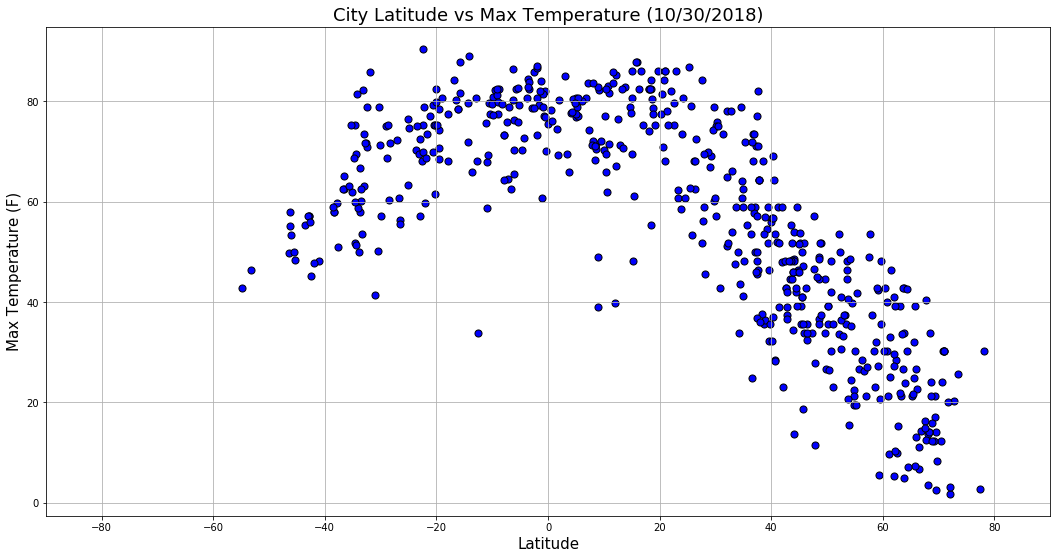

In [9]:
create_scatter_plot("CityLatitudeVsTemp",city_data_df['Lat'],city_data_df['Max Temp'],'City Latitude vs Max Temperature','Latitude','Max Temperature (F)')

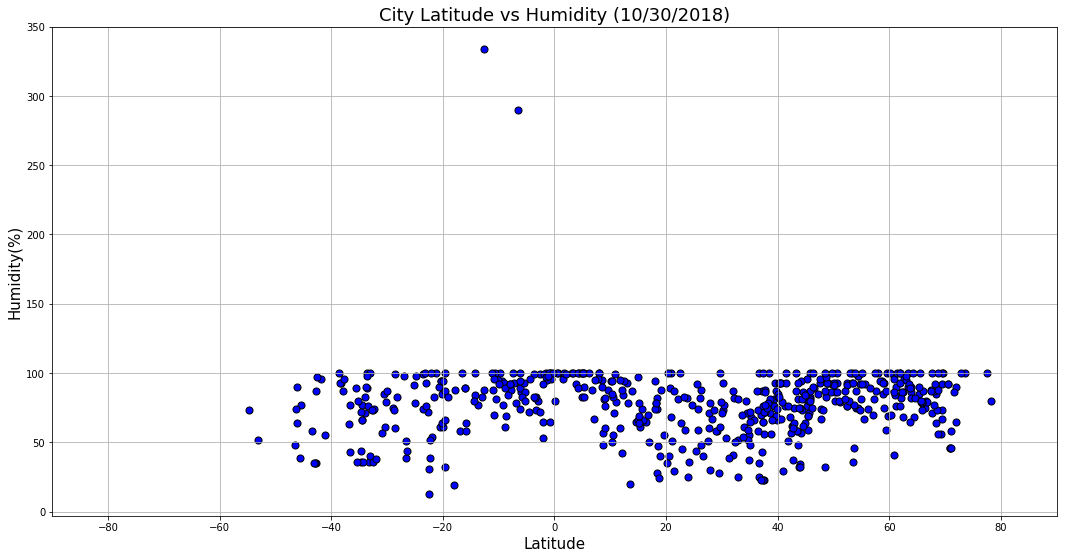

In [10]:
create_scatter_plot("CityLatitudeVsHumidity",city_data_df['Lat'],city_data_df['Humidity'],'City Latitude vs Humidity','Latitude','Humidity(%)')

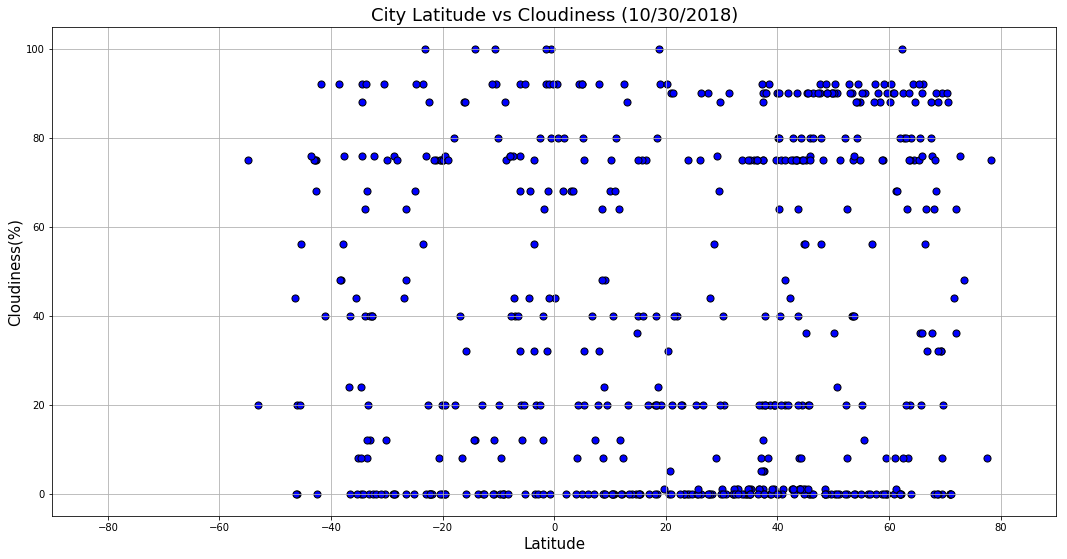

In [11]:
create_scatter_plot("CityLatitudeVsCloudiness",city_data_df['Lat'],city_data_df['Cloudiness'],'City Latitude vs Cloudiness','Latitude','Cloudiness(%)')

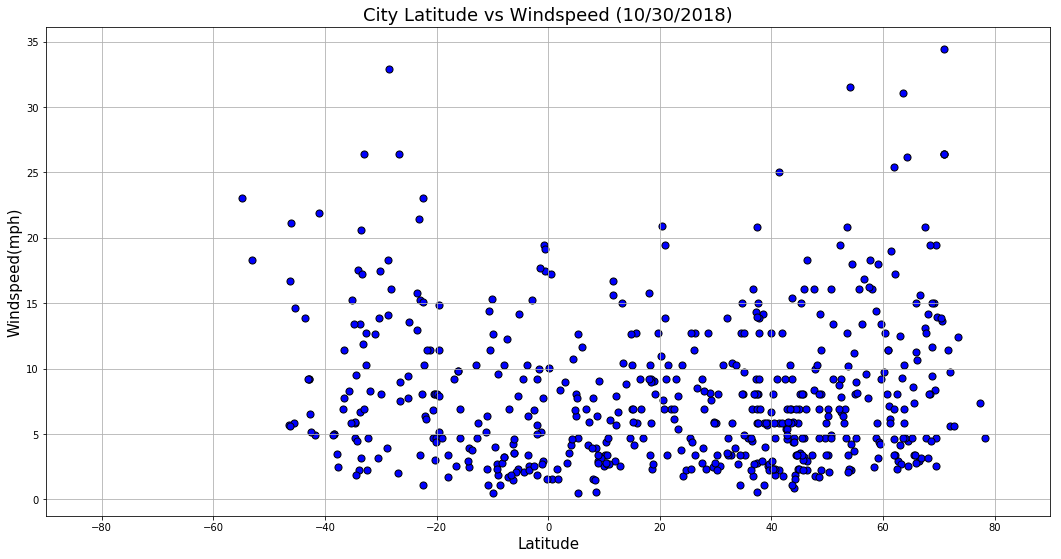

In [12]:
create_scatter_plot("CityLatitudeVsWindSpeed",city_data_df['Lat'],city_data_df['Wind Speed'],'City Latitude vs Windspeed','Latitude','Windspeed(mph)')

In [13]:
city_data_df.to_csv(output_data_file)

In [14]:
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bluff,92,AU,1540944242,99,-23.58,149.07,70.35,15.77
1,laguna,90,MX,1540939920,51,27.52,-110.01,84.20,9.17
2,vaini,0,IN,1540944243,61,15.34,74.49,61.03,4.14
3,georgetown,40,GY,1540940400,88,6.80,-58.16,80.60,6.93
4,punta arenas,20,CL,1540940400,52,-53.16,-70.91,46.40,18.34


In [16]:
city_data_df.to_html("datatable.html")